[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yusufokunlola/maternal-health/blob/main/notebook.ipynb)

### Context
Data has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

- Age: Age in years when a woman is pregnant.
- SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
- HeartRate: A normal resting heart rate in beats per minute.
- Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.


### Data Source

Data was sourced from [Kaggle](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv('MaternalHealthRisk.csv')
print("Data imported successfully")

Data imported successfully


In [3]:
# inspect dataframe by printing out the first 5 rows
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
# display all columns for better visibility
pd.set_option('display.max_columns', None)

In [5]:
# explore top 5 and bottom 5 data (full columns)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [6]:
# check the shape of the data
df.shape

(1014, 7)

In [7]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
# Checking for the null value.
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
# return a total count for each RiskLevel in the dataset
df.RiskLevel.value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [10]:
# check the datatype counts of the dataset
df.dtypes.value_counts()

int64      4
float64    2
object     1
dtype: int64

In [11]:
# number of unique values in each features
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [12]:
# statistical summary
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### visualize the distribution of the numerical variables

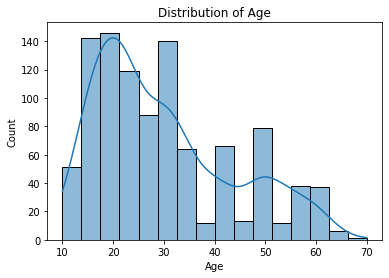

In [13]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

The Age distribustion above shows that women from age 25 to 48 are of higher risk of Maternal health issues while from age 48 to 50 also need to take precausions so that they do not suffer from Maternal health issues.

In [14]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [15]:
# Assign age distribution to a new column
# Define the conditions and corresponding designations
conditions = [
    df['Age'] <= 17,
    df['Age'] <= 44,
    df['Age'] <= 55,
    df['Age'] >= 56
]
designations = [
    'Children',
    'Pre-menopausal Adults',
    'Menopausal Adults',
    'Post-menopausal Adults'
]

# Use numpy.select() to create the new column
df['AgeDist'] = np.select(conditions, designations)

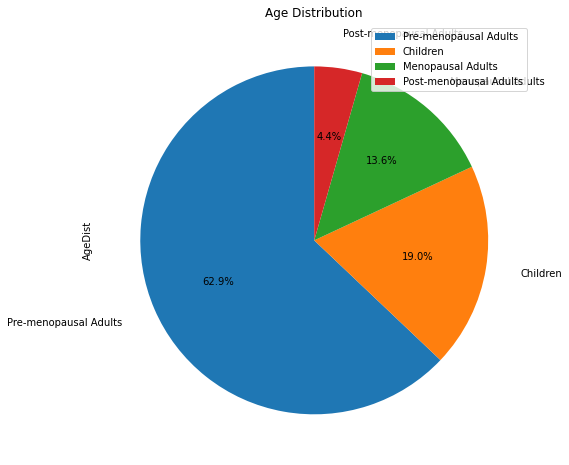

In [16]:
# Count the frequency of each value in the 'AgeDist' column
age_dist_counts = df['AgeDist'].value_counts()

# Create a pie chart of the frequency counts
age_dist_counts.plot.pie(autopct='%1.1f%%', startangle=90, labeldistance=1.2, figsize=(8, 8), legend=True)

# Set the title of the chart
plt.title('Age Distribution')

# Show the chart
plt.show()

The age distribution above from W.H.O 2022 and National Institute on Aging shows that Older adults are of higher risk of Maternal health with a percentage of 54.4.

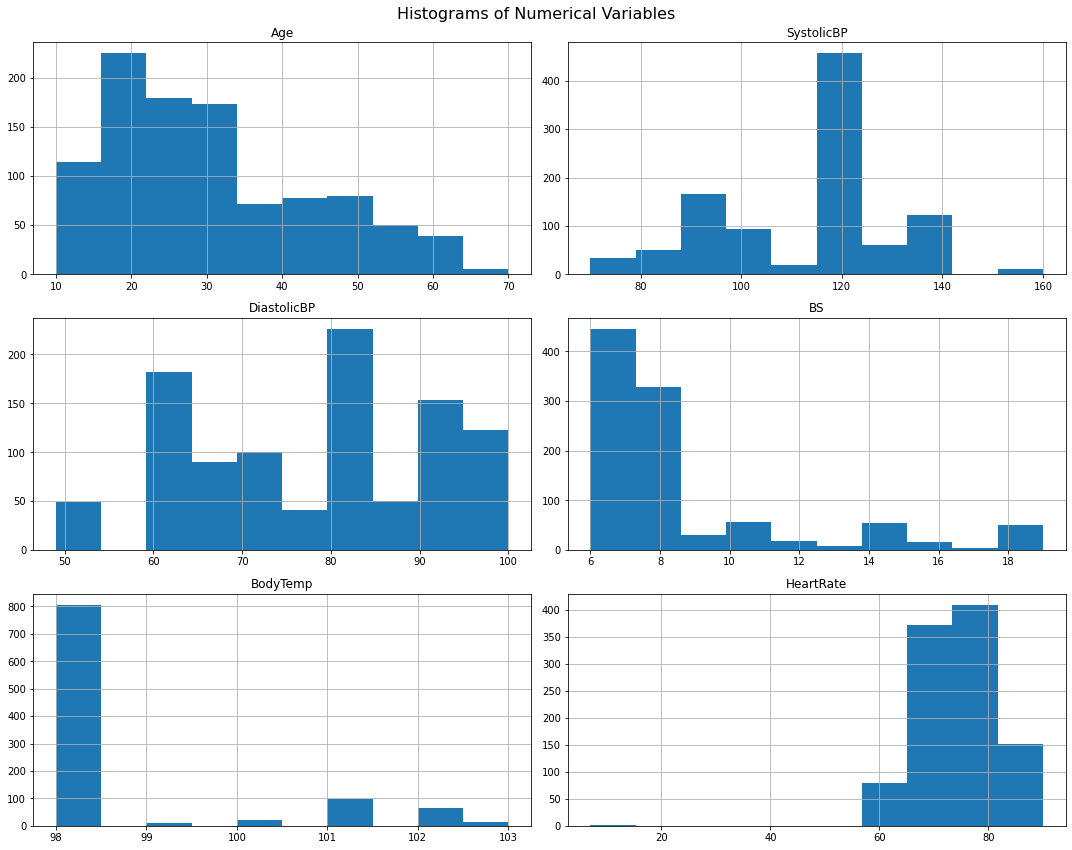

In [17]:
# Select only the numerical columns
num_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plot histograms for all numerical columns
df[num_cols].hist(bins=10, figsize=(15, 12))

# Add titles and axis labels
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

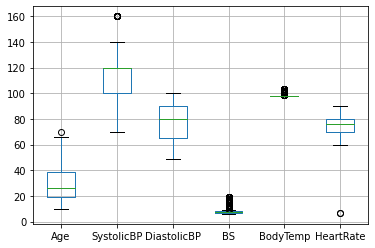

In [18]:
# Generate box plots for each column
df.boxplot()

# Show the plot
plt.show()

Questions

What is the acceptable range of value for the following columns:

    1. Age
    2. SystolicBP 
    3. DiastolicBP
    4. BS
    5. BodyTemp
    6. HeartRate

### visualize the relationship between the numerical variables and the target variable

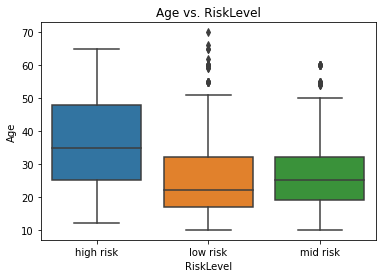

In [19]:
sns.boxplot(x='RiskLevel', y='Age', data=df)
plt.title('Age vs. RiskLevel')
plt.show()

From the boxplot above, it shows that women from age 25 to 48 are of higher risk of maternal health risk.

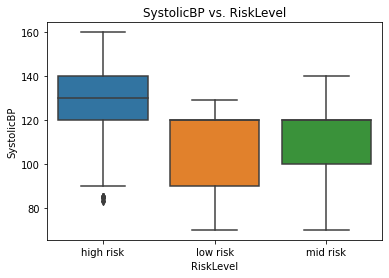

In [20]:
sns.boxplot(x='RiskLevel', y='SystolicBP', data=df)
plt.title('SystolicBP vs. RiskLevel')
plt.show()

SystolicBP measures the pressure in the artries when the heart beats and from the above plot, women with Bp between 120 to 140 are of high risk of suffering from maternal heallth risk.

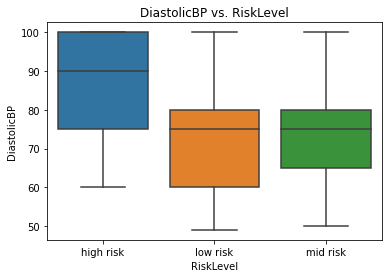

In [21]:
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=df)
plt.title('DiastolicBP vs. RiskLevel')
plt.show()

DiastolicBP measures the pressure in the heart when it is at rest between beats and the boxplot above shos that women between 75 to 100 DiastolicBp are of high risk of maternal health

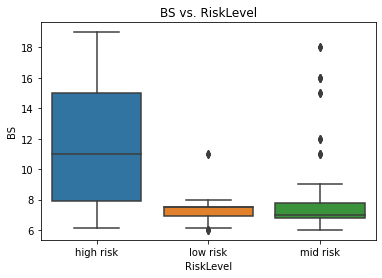

In [22]:
sns.boxplot(x='RiskLevel', y='BS', data=df)
plt.title('BS vs. RiskLevel')
plt.show()

BS is the blood glucose level also knon as blood sugar level, women between 8 to 14.5 blood sugar level are of high risk of maternal health as shown above.

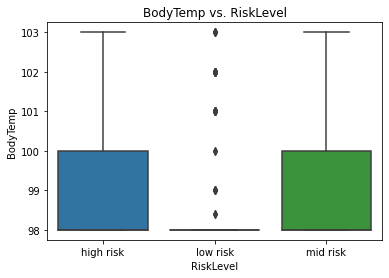

In [23]:
sns.boxplot(x='RiskLevel', y='BodyTemp', data=df)
plt.title('BodyTemp vs. RiskLevel')
plt.show()

Body temperature of a pregnant woman and it's effect varies depending on how old the pregnancy is however, from the boxplot above shos that women with body temperature between 98 to 100 are both at high risk and mis risk of maternal health.

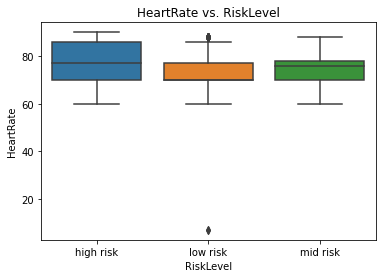

In [24]:
sns.boxplot(x='RiskLevel', y='HeartRate', data=df)
plt.title('HeartRate vs. RiskLevel')
plt.show()

During pregnancy the amount of blood pumped by the heart increase by 30 to 50% according to research by MSD Manuels however heart rate of 67 to 90 as shown above is of maternal risk.

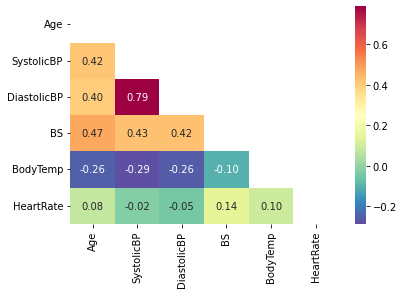

In [25]:
# correlation analysis
corrmat = df.drop(columns=['RiskLevel', 'AgeDist']).corr()
top_corr_features = corrmat.index
mask= np.triu(top_corr_features)
plt.figure(figsize=(6,4))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, fmt='.2f', mask=mask, cmap='Spectral_r');

## Modeling

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pickle

In [27]:
# the 'Age' column will be dropped as we now have the 'AgeDist' column
df.drop(columns=['Age'], inplace=True)

In [28]:
# find categorical variable and encode
cat_features = df.select_dtypes(include=['object', 'category']).columns
num_features = [col for col in df.columns if col not in cat_features]

# print categorical variable
print("Categorical features: ", cat_features)

# print numerical variable
print("Numerical features: ", num_features)

Categorical features:  Index(['RiskLevel', 'AgeDist'], dtype='object')
Numerical features:  ['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


In [29]:
# label encoding
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [30]:
# save file to disk for modeling
df.to_csv("healthrisk.csv", index=False)

In [31]:
# split data into train and test set
X = df.drop(columns='RiskLevel')
y = df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = ['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'AgeDist']

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[num_features])
X_test = scaler.transform(X_test[num_features])

In [32]:
# instantiate models
modelclasses = {'LogisticReg': LogisticRegression(), 
                'SVC': SVC(), 
                'DecisionTree': DecisionTreeClassifier(),
                'RandomForest': RandomForestClassifier()
                }

In [33]:
# Iteration of models

# create a list to store model results
acc_scores = []
f1_scores = []

for model_name, model_method in modelclasses.items():
       
    # fit model to training data
    model_method.fit(X_train, y_train)
    
    # predict the outcomes on the test set
    y_pred = model_method.predict(X_test)
    
    # append accuracy evaluation metric for the model to the list 
    acc_scores.append(accuracy_score(y_test, y_pred))
    
    # append R2 score evaluation metric for the model to the list
    f1_scores.append(f1_score(y_test, y_pred, pos_label='positive', average='macro'))
    
# create a dataframe to store the results
cla_results = pd.DataFrame({"Model":modelclasses.keys(), "Accuracy Score": acc_scores, "F1 Score": f1_scores})
cla_results

,Model,Accuracy Score,F1 Score
0,LogisticReg,0.655172,0.641373
1,SVC,0.684729,0.686357
2,DecisionTree,0.802956,0.807968
3,RandomForest,0.812808,0.820774


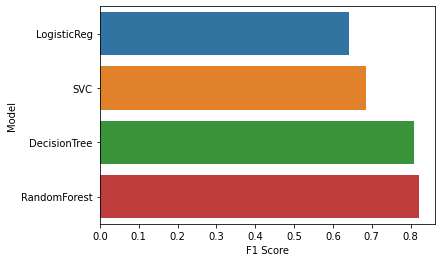

In [34]:
# plot the R2 Score 
sns.barplot(x=cla_results['F1 Score'], y=cla_results.Model);

In [35]:
# Hyperparameter tuning for Random Forest Regressor using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                  param_distributions={
                                    'max_depth': [10, 20, 30, 40],
                                    'min_samples_split': [2, 5, 10],
                                    'n_estimators': [100, 80, 60, 55, 51, 45]
                                  },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                                  n_iter=50, random_state = 1
                                )

random_search.fit(X_train, y_train)

best_params=random_search.best_params_

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_search.best_estimator_)
print("\n The best score across ALL searched params:\n", random_search.best_score_)
print("\n The best parameters across ALL searched params:\n", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=30, n_estimators=60)

 The best score across ALL searched params:
 0.5098139444407926

 The best parameters across ALL searched params:
 {'n_estimators': 60, 'min_samples_split': 2, 'max_depth': 30}


In [36]:
# Build Random Forest Regression Model
model = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], min_samples_split=best_params['min_samples_split'])

# fit model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Evaluation Metrics
def evaluation_metrics_func(y_test, y_pred):
    
    #print('Evaluation metric results:-')
    print('Accuracy score : \n', accuracy_score(y_test, y_pred))
    print('F1 score : \n', f1_score(y_test, y_pred, pos_label="positive", average="macro"))
    print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('Classification Report : \n', classification_report(y_test, y_pred))

In [38]:
# computing the evaluation metrics
evaluation_metrics_func(y_test, y_pred)

Accuracy score : 
 0.7931034482758621
F1 score : 
 0.8008191761914215
Confusion Matrix: 
 [[39  1  7]
 [ 3 57 20]
 [ 3  8 65]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        47
           1       0.86      0.71      0.78        80
           2       0.71      0.86      0.77        76

    accuracy                           0.79       203
   macro avg       0.81      0.80      0.80       203
weighted avg       0.81      0.79      0.79       203



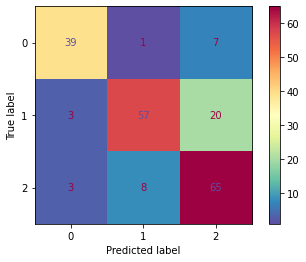

In [39]:
# plot confusion matrix for RandomForestClassifier
plot_confusion_matrix(model, X_test, y_test, cmap='Spectral_r');

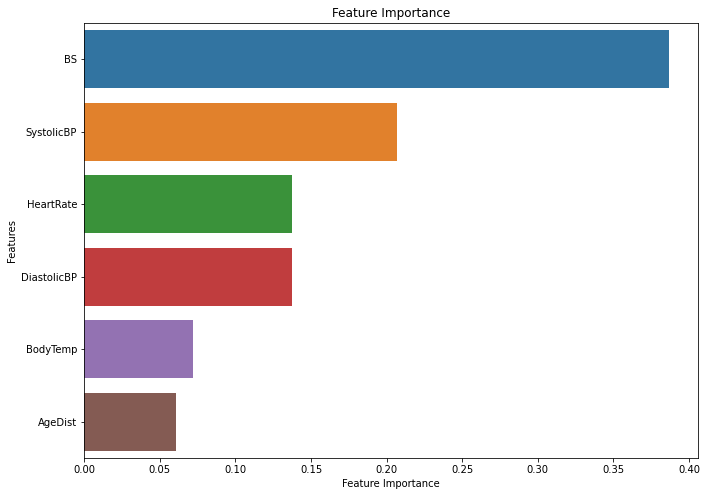

In [40]:
# obtain feature weights for random forest regression
feat_imp = model.feature_importances_

# create a dataframe of feature weight
feat_imp_ = pd.DataFrame(feat_imp, X.columns, columns=["Feature Importance"]).sort_values(by="Feature Importance", ascending=False)

# plot feature weights
plt.figure(figsize=(11,8))
plt.ylabel('Features')
plt.title('Feature Importance')
sns.barplot(x=feat_imp_['Feature Importance'], y=feat_imp_.index);

In [41]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))